In [24]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [25]:
data = pd.read_csv("/content/T-test data.csv")

In [26]:
print(data.columns)
print(data.head())

Index(['Sl.NO', 'Child Name', 'DG ', 'school_type', 'English', 'Math',
       'out of', 'marks'],
      dtype='object')
   Sl.NO  Child Name  DG  school_type  English  Math  out of  marks
0      1   Thimmappa    0  government        4     4      10   80.0
1      2  Kumarswamy    0  government        2     3      10   50.0
2      3       Arman    0  government        4     4      10   80.0
3      4    Madhukar    0  government        4     4      10   80.0
4      5  Saba Reddy    0     private        5     5      10  100.0


In [27]:
data.rename(columns={'DG ':'DG'},inplace=True)

In [28]:
# 1. DG alumni: Private vs Government
private = data[(data['DG'] == 1) & (data['school_type'] == 'private')]['marks']
govt = data[(data['DG'] == 1) & (data['school_type'] == 'government')]['marks']
t1, p1 = stats.ttest_ind(private, govt, equal_var=False)

In [29]:
# 2. DG vs Non-DG
dg = data[data['DG'] == 1]['marks']
non_dg = data[data['DG'] == 0]['marks']
t2, p2 = stats.ttest_ind(dg, non_dg, equal_var=False)

In [30]:

# 3. Private vs Government (all)
priv_all = data[data['school_type'] == 'private']['marks']
gov_all = data[data['school_type'] == 'government']['marks']
t3, p3 = stats.ttest_ind(priv_all, gov_all, equal_var=False)

In [31]:
print(f"Case 1: t={t1:.2f}, p={p1:.6f}")
print(f"Case 2: t={t2:.2f}, p={p2:.6f}")
print(f"Case 3: t={t3:.2f}, p={p3:.6f}")


Case 1: t=4.39, p=0.000537
Case 2: t=0.75, p=0.454936
Case 3: t=5.93, p=0.000001


In [42]:
# Plotting function
def plot_t_distribution(t_stat, df, alpha=0.05):
    # Define x-axis range for the plot
    x = np.linspace(-6, 6, 400)
    y = stats.t.pdf(x, df)

    # Calculate the critical t-value for two-tailed test
    t_critical = stats.t.ppf(1 - alpha / 2, df)

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f"df={df}", color="blue")

    # Shade the critical region
    plt.fill_between(x, y, where=(x <= -t_critical), color="red", alpha=0.3, label="Critical Region (left)")
    plt.fill_between(x, y, where=(x >= t_critical), color="red", alpha=0.3, label="Critical Region (right)")

    # Mark the critical t-values (for two-tailed test)
    plt.axvline(t_critical, color="green", linestyle=":", label=f"Critical t+={t_critical:.2f}")
    plt.axvline(-t_critical, color="green", linestyle=":", label=f"Critical t-={-t_critical:.2f}")

    # Only plot the t-statistic on the relevant side of the distribution
    if t_stat > 0:
        plt.axvline(t_stat, color="red", linestyle="--", label=f"t={t_stat:.2f}")
    else:
        plt.axvline(t_stat, color="red", linestyle="--", label=f"t={t_stat:.2f}")

    # Adding labels and title
    plt.title("t-Distribution with t-statistic and Critical Values")
    plt.xlabel("t-value")
    plt.ylabel("Density")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()


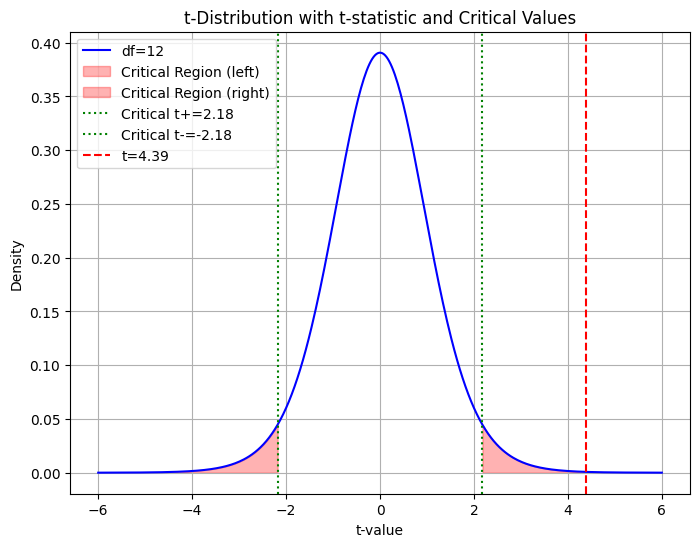

In [43]:
df1 = min(len(private) - 1, len(govt) - 1)  # DF for Case 1
plot_t_distribution(t1, df1)


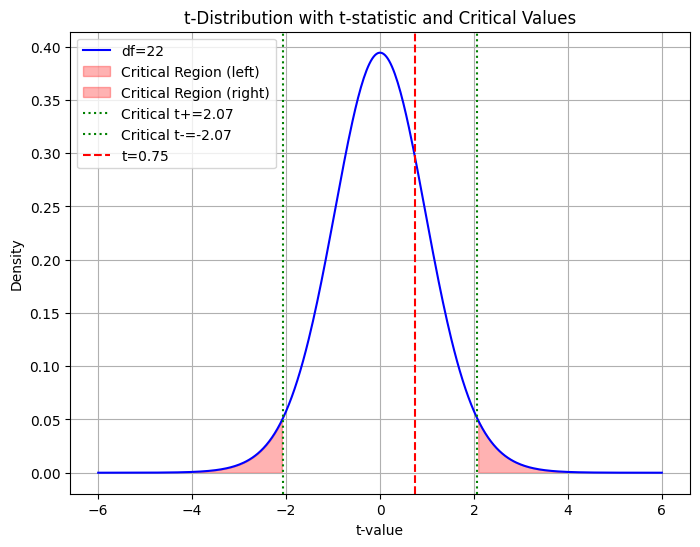

In [44]:
# Case 2
df2 = min(len(dg) - 1, len(non_dg) - 1)  # DF for Case 2
plot_t_distribution(t2, df2)


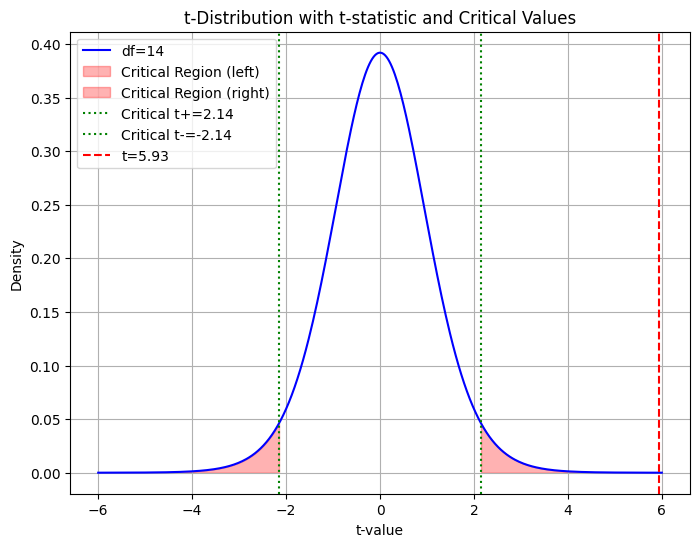

In [45]:
# Case 3
df3 = min(len(priv_all) - 1, len(gov_all) - 1)  # DF for Case 3
plot_t_distribution(t3, df3)